In [255]:
import numpy as np
import nibabel as nib # used to read in nifti files

In [256]:
from collections import Counter
file_address = "C:/Users/Rhydian/Documents/Work/MPhysProject/nifty folder/" # directory containing both nifti files
mask_name = "insidemasksnew/NSCLC7_registered_OARsinside0_20.nii" # name of mask nifti
true_img_name = "fullscans/NSCLC7_registered_OARsfullscan2.nii" # name of reference scan nifti
# load in data
mask_img = nib.load(file_address+mask_name)
mask_data = mask_img.get_data()
true_img = nib.load(file_address+true_img_name)
true_data = true_img.get_data()
print(mask_data.shape)
print(true_data.shape)
mask_data = np.array(mask_data)
true_data = np.array(true_data)
true_data[np.where(true_data == 1)] = 0 # set the minimum value of true data to zero
mask_data[np.where(mask_data == 255)] = 1 # set max values of the true data to 1 to make multiplication easier

(410, 410, 264)
(410, 410, 264)


This is the bit where we do some stuff with some stuff.

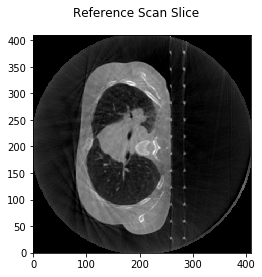

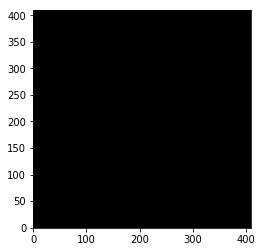

In [257]:
import matplotlib.pyplot as plt
def show_slice(slice_obj):
    # Function to display row of image slices
    fig, axes = plt.subplots(1)
    axes.imshow(slice_obj, cmap="gray", origin="lower")

px_count = [] # array to store each slice of CT scan in
for i in range(0,120,1):
    slice_i = mask_data[:, :, i]
    px_count.append(slice_i)
    
show_slice(true_data[:, :, 60]) # show slice from reference scan
plt.suptitle("Reference Scan Slice") # 
show_slice(mask_data[:, :, 60])

plt.show()


0


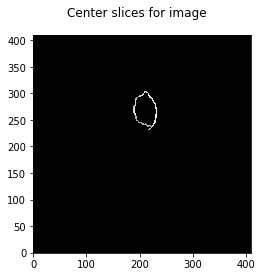

In [258]:
# combine mask with full scan pixel values

mask_data_new = mask_data*true_data
print(mask_data_new.min())
show_slice(mask_data_new[:, :, 170])
plt.suptitle("Center slices for image")
plt.show()


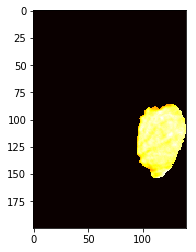

In [262]:
from PIL import Image
def show_highlighted_slice(slice_obj):
    # Function to display row of image slices
    cdict = {"red": np.linspace(0,600,600),
            "green": np.linspace(600,800,200),
            "blue": np.linspace(800,10000,9200)}
    fig, axes = plt.subplots(1)
    axes.imshow(slice_obj,cmap="hot")
roi = mask_data_new[150:350, 100:240, 142]
img = nib.Nifti1Image(mask_data_new, np.eye(4))
nib.save(img,"test.nii")
show_highlighted_slice(roi)
#highlighted_roi = np.zeros(roi.shape,dtype='i,i,i')
#highlighted_roi[np.where(np.logical_and(roi > 600,roi<800))] = (0,0,255)
#highlighted_roi[np.where(np.logical_and(roi <= 600,roi>0))] = (0,255,0)
#highlighted_roi[np.where(roi >= 800)] = (255,0,0)
#list_of_pixels = list(highlighted_roi)
#img = Image.fromarray(highlighted_roi, 'RGB')
plt.show()

In [68]:
output_file = open("nsclc1.csv",'w')
# find mean pixel value
import numpy as np
for i in range(410):
    for j in range(410):
        for k in range(120):
            if mask_data[i,j,k] != 0:
                output_file.write(str(i) +","+str(j)+","+str(k)+","+str(mask_data[i,j,k])+"\n")
output_file.close()
